# Topic - Mortality Prediction in ICU
    
Patients admitted to the ICU suffer from critical illness or injury and are at high risk of dying. ICU mortality rates differ widely depending on the underlying disease process, with death rates as low as 1 in 20 for patients admitted following elective surgery, and as high as 1 in 4 for patients with respiratory diseases. The risk of death can be approximated by evaluating the severity of a patient’s illness as determined by important physiologic, clinical, and demographic determinants.

## Importing libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import keras

Using TensorFlow backend.


## Reading and Understanding Data

In [3]:
df = pd.read_csv('train.csv', encoding = 'utf-8')
df_label = pd.read_csv('labels.csv', encoding = 'utf-8')

In [4]:
df.head()

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,...,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH
0,77.0,31.0,46.0,54,2.973333,10.500000,0.7,154.0,0.750000,58.795833,...,17.428571,97.250000,116.891892,37.357143,2.1,0.14,171.052632,10.300000,80.060976,7.387273
1,77.0,31.0,46.0,76,2.973333,18.333333,0.7,154.0,1.100000,58.897059,...,19.000000,96.833333,113.411765,36.939130,2.1,0.14,151.560976,11.266667,80.670588,7.395000
2,116.0,83.0,199.5,44,2.500000,4.666667,2.9,154.0,0.333333,67.125000,...,19.000000,95.000000,125.687500,37.800000,2.1,0.14,124.951220,4.700000,56.700000,7.495000
3,105.0,12.0,15.0,68,4.400000,17.666667,0.2,154.0,0.766667,58.795833,...,15.457627,97.250000,116.891892,36.223077,2.1,0.14,545.833333,9.400000,84.600000,7.387273
4,77.0,31.0,46.0,88,3.300000,35.000000,0.7,154.0,1.000000,58.795833,...,19.166667,97.250000,116.891892,36.880000,2.1,0.14,62.131579,4.300000,80.060976,7.387273


In [5]:
df.columns

Index(['ALP', 'ALT', 'AST', 'Age', 'Albumin', 'BUN', 'Bilirubin',
       'Cholesterol', 'Creatinine', 'DiasABP', 'FiO2', 'GCS', 'Gender',
       'Glucose', 'HCO3', 'HCT', 'HR', 'Height', 'ICUType', 'K', 'Lactate',
       'MAP', 'MechVent', 'Mg', 'NIDiasABP', 'NIMAP', 'NISysABP', 'Na',
       'PaCO2', 'PaO2', 'Platelets', 'RecordID', 'RespRate', 'SaO2', 'SysABP',
       'Temp', 'TroponinI', 'TroponinT', 'Urine', 'WBC', 'Weight', 'pH'],
      dtype='object')

In [6]:
print('Number of rows = ',df.shape[0])
print('Number of columns = ',df.shape[1])

Number of rows =  3999
Number of columns =  42


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 42 columns):
ALP            3999 non-null float64
ALT            3999 non-null float64
AST            3999 non-null float64
Age            3999 non-null int64
Albumin        3999 non-null float64
BUN            3999 non-null float64
Bilirubin      3999 non-null float64
Cholesterol    3999 non-null float64
Creatinine     3999 non-null float64
DiasABP        3999 non-null float64
FiO2           3999 non-null float64
GCS            3999 non-null float64
Gender         3999 non-null int64
Glucose        3999 non-null float64
HCO3           3999 non-null float64
HCT            3999 non-null float64
HR             3999 non-null float64
Height         3999 non-null float64
ICUType        3999 non-null int64
K              3999 non-null float64
Lactate        3999 non-null float64
MAP            3999 non-null float64
MechVent       3999 non-null int64
Mg             3999 non-null float64
NIDiasABP    

In [8]:
df_label.head()

,In-hospital_death
0,0
1,0
2,0
3,0
4,0


In [9]:
df_label = df_label.rename(columns={'In-hospital_death':'class'})
df_label.head()

,class
0,0
1,0
2,0
3,0
4,0


In [10]:
print('Number of rows = ',df_label.shape[0])
print('Number of columns = ',df_label.shape[1])

Number of rows =  3999
Number of columns =  1


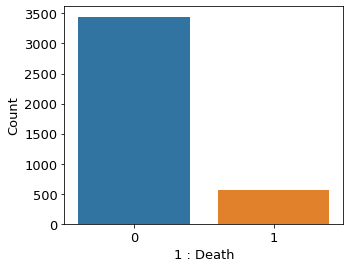

In [11]:
plt.figure(figsize=(5,4))
sns.countplot(x='class',data = df_label)
plt.xlabel('1 : Death',fontsize=13)
plt.ylabel('Count',fontsize=13)
plt.tick_params(labelsize=13);

In [12]:
temp  = []

for i in df_label["class"]:
    if i == 0:
        temp.append([1,0])
    else:
        temp.append([0,1])

temp = np.array(temp)

In [13]:
print(temp.shape)

(3999, 2)


In [14]:
combine_df = pd.concat([df, df_label] , axis = 1)

print('Number of rows = ',combine_df.shape[0])
print('Number of columns = ',combine_df.shape[1])

Number of rows =  3999
Number of columns =  43


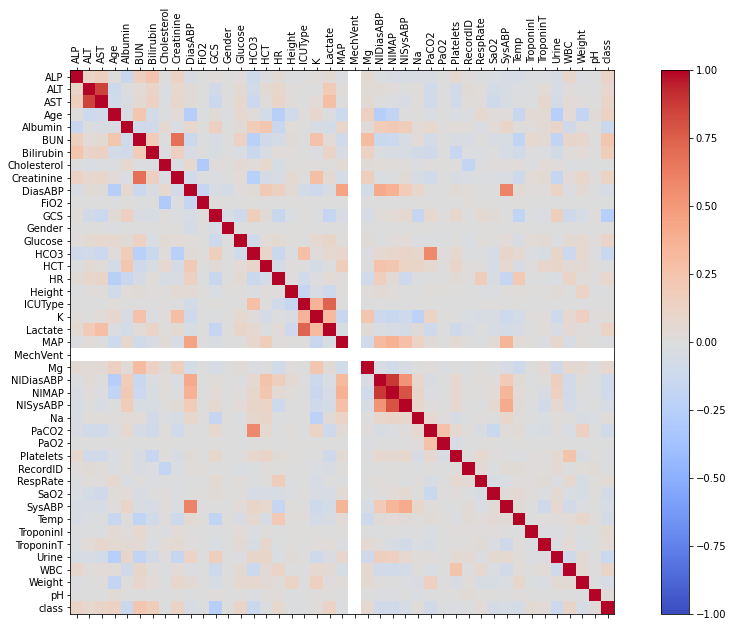

In [15]:
corr = combine_df.corr()
fig = plt.figure(figsize=(17,10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(combine_df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(combine_df.columns)
ax.set_yticklabels(combine_df.columns)
plt.show()

In [16]:
corr_matrix = combine_df.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 85%
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

In [17]:
to_drop

['AST', 'NIMAP']

In [18]:
combine_df.drop(['AST', 'NIMAP'], axis=1, inplace=True)

In [19]:
X = combine_df.drop('class', axis=1).values
y = temp

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [21]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(3199, 40) (800, 40) (3199, 2) (800, 2)


In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
# only transform test data
X_test = scaler.transform(X_test)

In [23]:
X_train

array([[4.62223237e-02, 3.28212181e-04, 8.53333333e-01, ...,
        8.02139038e-02, 2.58010118e-01, 3.88368673e-03],
       [4.45103858e-02, 3.06331369e-03, 1.00000000e+00, ...,
        8.65945552e-02, 1.88853288e-01, 4.05400670e-03],
       [4.45103858e-02, 3.06331369e-03, 2.66666667e-01, ...,
        4.95867769e-02, 2.58215769e-01, 3.38212380e-03],
       ...,
       [4.45103858e-02, 3.06331369e-03, 8.80000000e-01, ...,
        6.78172095e-02, 3.52445194e-01, 3.88368673e-03],
       [4.10865099e-02, 3.24565379e-03, 7.73333333e-01, ...,
        9.51628586e-02, 2.41342798e-01, 3.91566251e-03],
       [4.45103858e-02, 3.06331369e-03, 4.80000000e-01, ...,
        6.78172095e-02, 3.34232715e-01, 4.43869489e-03]])

In [24]:
print(X.shape , y.shape)

(3999, 40) (3999, 2)


## Model Building

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Dropout , BatchNormalization
from keras.utils import np_utils
from keras.optimizers import RMSprop, Adam
from sklearn.metrics import accuracy_score

In [26]:
model = Sequential()

model.add(Dense(64, input_dim=X_train.shape[1] , activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(196, activation='relu'))
model.add(Dense(196, activation='relu'))

model.add(BatchNormalization())

model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer = Adam(lr = 0.0005),loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                2624      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 196)               25284     
_________________________________________________________________
dense_4 (Dense)              (None, 196)               38612     
_________________________________________________________________
batch_normalization_1 (Batch (None, 196)               784       
_________________________________________________________________
dense_5 (Dense)              (None, 256)               50432     
_________________________________________________________________
dense_6 (Dense)              (None, 2)                

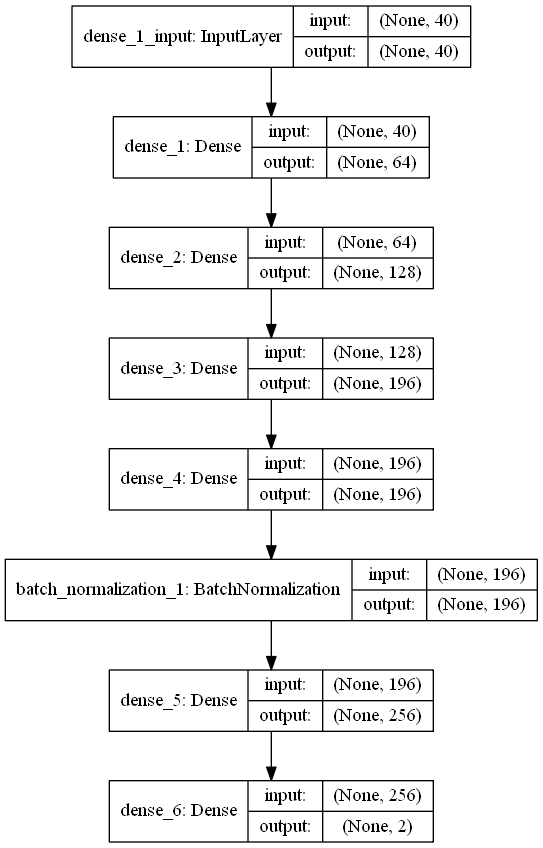

In [27]:
# visualizing the model
from keras.utils import plot_model
plot_model(model, show_shapes=True)

## Model Training

In [28]:
model.fit(X_train, y_train, epochs=18, batch_size = 128, validation_data=(X_test, y_test))

Train on 3199 samples, validate on 800 samples
Epoch 1/18
3199/3199 [==============================] - 0s 114us/step - loss: 0.4296 - accuracy: 0.8462 - val_loss: 0.5321 - val_accuracy: 0.8712
Epoch 2/18
3199/3199 [==============================] - 0s 27us/step - loss: 0.3408 - accuracy: 0.8621 - val_loss: 0.4866 - val_accuracy: 0.8712
Epoch 3/18
3199/3199 [==============================] - 0s 27us/step - loss: 0.3283 - accuracy: 0.8686 - val_loss: 0.4847 - val_accuracy: 0.8712
Epoch 4/18
3199/3199 [==============================] - 0s 30us/step - loss: 0.3153 - accuracy: 0.8701 - val_loss: 0.4874 - val_accuracy: 0.8712
Epoch 5/18
3199/3199 [==============================] - 0s 28us/step - loss: 0.3062 - accuracy: 0.8743 - val_loss: 0.4743 - val_accuracy: 0.8712
Epoch 6/18
3199/3199 [==============================] - 0s 27us/step - loss: 0.3036 - accuracy: 0.8720 - val_loss: 0.4541 - val_accuracy: 0.8712
Epoch 7/18
3199/3199 [==============================] - 0s 26us/step - loss: 0.298

In [29]:
result = pd.DataFrame(model.history.history)

## Evaluating the Model

In [30]:
test_acc = model.evaluate(X_test, y_test)
print("\nAccuracy on test data = ", round(test_acc[1],3)*100,'%')

800/800 [==============================] - 0s 24us/step

Accuracy on test data =  87.0 %


In [31]:
predictions = model.predict_classes(X_test)
predictions

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)

In [34]:
cf_matrix = confusion_matrix(y_true, pred)
cf_matrix

array([[662,  35],
       [ 68,  35]], dtype=int64)

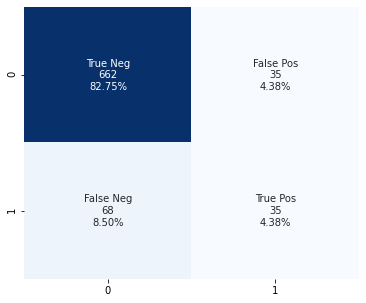

In [35]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]

group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(6,5))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', cbar=False);

## Will this patient going to die?

In [36]:
single_patient = combine_df.drop('class', axis=1).iloc[0]

In [37]:
single_patient

ALP                77.000000
ALT                31.000000
Age                54.000000
Albumin             2.973333
BUN                10.500000
Bilirubin           0.700000
Cholesterol       154.000000
Creatinine          0.750000
DiasABP            58.795833
FiO2                0.526667
GCS                14.923077
Gender              0.000000
Glucose           160.000000
HCO3               27.000000
HCT                32.500000
HR                 70.810811
Height            170.200000
ICUType             4.000000
K                   4.200000
Lactate             1.900000
MAP                78.934007
MechVent            1.000000
Mg                  1.700000
NIDiasABP          50.147059
NISysABP          114.382353
Na                136.500000
PaCO2              39.666667
PaO2              138.871212
Platelets         203.000000
RecordID       132539.000000
RespRate           17.428571
SaO2               97.250000
SysABP            116.891892
Temp               37.357143
TroponinI     

In [38]:
combine_df.drop('class', axis=1).shape

(3999, 40)

In [39]:
single_patient.values.reshape(-1,40)

array([[7.70000000e+01, 3.10000000e+01, 5.40000000e+01, 2.97333333e+00,
        1.05000000e+01, 7.00000000e-01, 1.54000000e+02, 7.50000000e-01,
        5.87958333e+01, 5.26666667e-01, 1.49230769e+01, 0.00000000e+00,
        1.60000000e+02, 2.70000000e+01, 3.25000000e+01, 7.08108108e+01,
        1.70200000e+02, 4.00000000e+00, 4.20000000e+00, 1.90000000e+00,
        7.89340074e+01, 1.00000000e+00, 1.70000000e+00, 5.01470588e+01,
        1.14382353e+02, 1.36500000e+02, 3.96666667e+01, 1.38871212e+02,
        2.03000000e+02, 1.32539000e+05, 1.74285714e+01, 9.72500000e+01,
        1.16891892e+02, 3.73571429e+01, 2.10000000e+00, 1.40000000e-01,
        1.71052632e+02, 1.03000000e+01, 8.00609756e+01, 7.38727273e+00]])

In [40]:
single_patient = scaler.transform(single_patient.values.reshape(-1,40))
single_patient

array([[ 4.45103858e-02,  3.06331369e-03,  5.20000000e-01,
         4.46031746e-01,  4.89372220e-02,  1.29682997e-02,
         4.66666667e-01,  3.38312830e-02,  5.51210937e-01,
         1.77445886e-06,  9.94505494e-01,  0.00000000e+00,
         2.65338645e-01,  2.05755396e-01,  3.57705287e-01,
         5.02890478e-01,  3.75358166e-01,  2.24505527e-05,
         1.25925926e-01,  1.77304965e-02,  2.99937651e-01,
         0.00000000e+00,  1.43322476e-01,  4.72986302e-01,
         4.88813474e-01,  4.71401634e-01,  2.82786885e-01,
         2.59004816e-01,  2.13800905e-01, -9.86874568e-05,
         2.28081743e-01,  9.55065359e-01,  6.54332862e-01,
         8.67886179e-01,  3.68098160e-02,  5.40990429e-03,
         5.54936701e-02,  7.43801653e-02,  2.58215769e-01,
         3.90237387e-03]])

In [41]:
pred = model.predict(single_patient) > 0.8
pred

array([[ True, False]])

Do not worry he/she will not be going to die :)

**Note: One should keep in mind that these values are just predicted values and the predictions can be wrong.**